In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')  

# Basic info
print(df.shape)
print(df.info())
print(df.isnull().sum())

C:\Users\HP\AppData\Local\Temp\ipykernel_7340\2200180895.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


(1000098, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

In [18]:
#Overall Loss Ratio (TotalClaims / TotalPremium)
#Portfolio-Level
print(df[['TotalPremium', 'TotalClaims']].describe())
loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"Overall Loss Ratio: {loss_ratio:.2%}")

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05
Overall Loss Ratio: 104.77%


In [5]:
#Breakdown by Province, VehicleType, Gender:
# By Province
loss_ratio_province = df.groupby('Province').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
print(loss_ratio_province.sort_values(ascending=False))

# By VehicleType
loss_ratio_vehicle = df.groupby('VehicleType').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
print(loss_ratio_vehicle.sort_values(ascending=False))

# By Gender
loss_ratio_gender = df.groupby('Gender').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
print(loss_ratio_gender)

C:\Users\HP\AppData\Local\Temp\ipykernel_7340\682777640.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_province = df.groupby('Province').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


Province
Gauteng          1.222018
KwaZulu-Natal    1.082693
Western Cape     1.059472
North West       0.790367
Mpumalanga       0.720897
Free State       0.680758
Limpopo          0.661199
Eastern Cape     0.633813
Northern Cape    0.282699
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7340\682777640.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_vehicle = df.groupby('VehicleType').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


VehicleType
Heavy Commercial     1.628112
Medium Commercial    1.050251
Passenger Vehicle    1.048198
Light Commercial     0.232066
Bus                  0.137292
dtype: float64
Gender
Female           0.821879
Male             0.883910
Not specified    1.059311
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_7340\682777640.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_gender = df.groupby('Gender').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


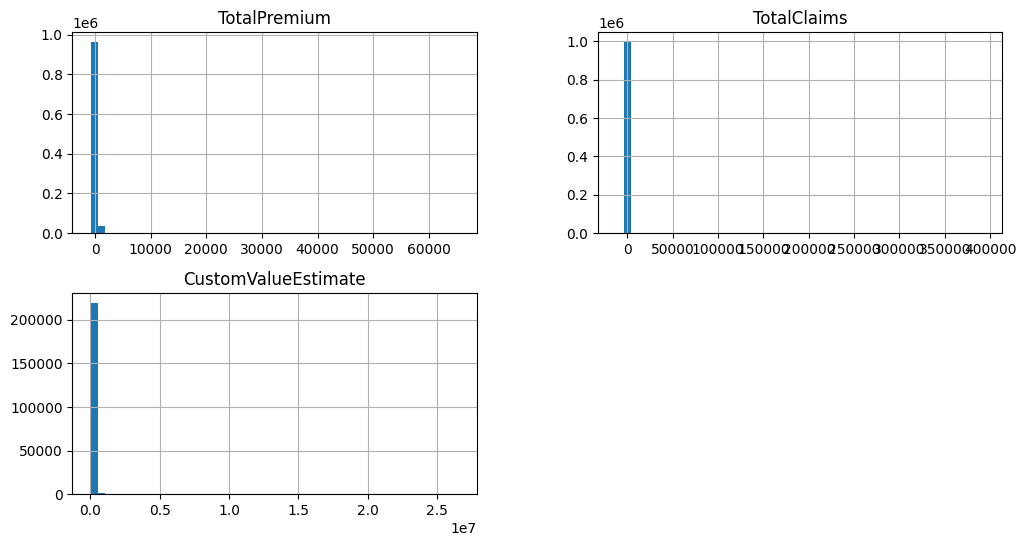

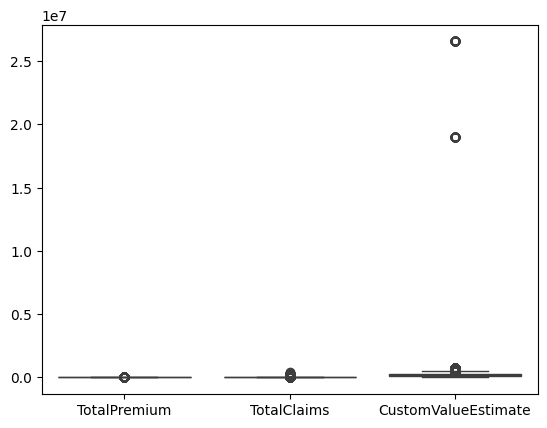

In [6]:
#Distributions & Outliers
#Key Financial Variables (TotalPremium, TotalClaims, CustomValueEstimate):
# Histograms
df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].hist(bins=50, figsize=(12, 6))
plt.show()

# Boxplots for outliers
sns.boxplot(data=df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']])
plt.show()

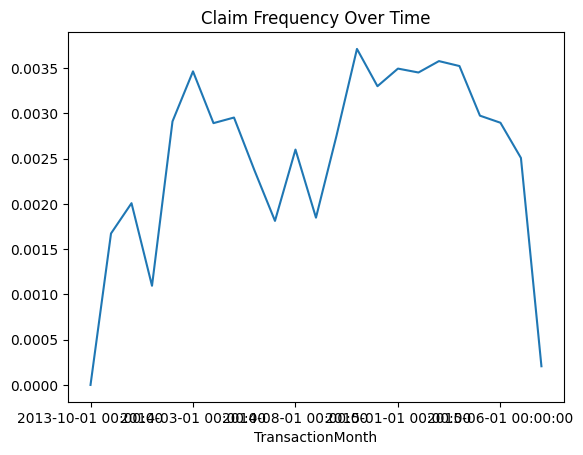

In [7]:
#Temporal Trends (18-Month Period)
#Claim Frequency (% of policies with claims):
df['HasClaim'] = df['TotalClaims'] > 0
monthly_claims = df.groupby('TransactionMonth')['HasClaim'].mean()
monthly_claims.plot(title="Claim Frequency Over Time")
plt.show()

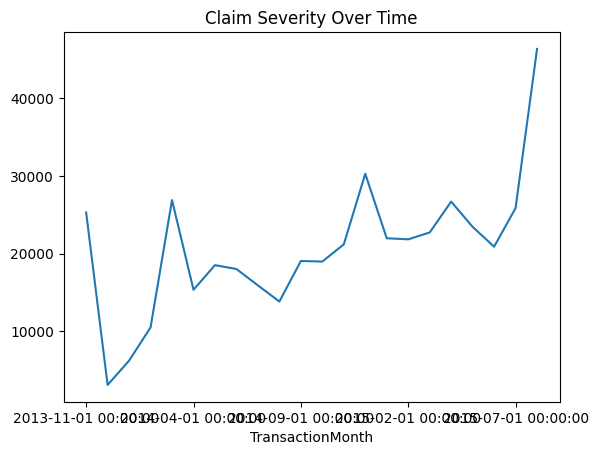

In [8]:
#Claim Severity (Avg. claim amount when claim occurs):
monthly_severity = df[df['TotalClaims'] > 0].groupby('TransactionMonth')['TotalClaims'].mean()
monthly_severity.plot(title="Claim Severity Over Time")
plt.show()

In [17]:
#High/Low Claim Vehicles (Make & Model)
#Top 5 Highest Claim Vehicles:
high_claim_vehicles = df.groupby(['make', 'Model'])['TotalClaims'].mean().sort_values(ascending=False).head(5)
print(high_claim_vehicles)

make           Model                      
TOYOTA         L/CRUISER FJ 4.0 V6 CRUISER    5340.970273
HYUNDAI        H-1 2.5 CRDI WAGON A/T         4118.181043
FIAT           DUCATO 2.3 JTD VETRATO         1014.681021
VOLKSWAGEN     POLO VIVO 1.6 5Dr               827.558882
MERCEDES-BENZ  C180 BE COUPE                   743.459027
Name: TotalClaims, dtype: float64


In [19]:
#Top 5 Lowest Claim Vehicles:
low_claim_vehicles = df.groupby(['make', 'Model'])['TotalClaims'].mean().sort_values().head(5)
print(low_claim_vehicles)

make           Model                  
MERCEDES-BENZ  C200K CLASSIC A/T         -0.250832
VOLKSWAGEN     TOURAN 1.4 TSi HIGHLINE    0.000000
BMW            523i A/T (E60)             0.000000
               330i (E90)                 0.000000
               328i (F30)                 0.000000
Name: TotalClaims, dtype: float64


<Axes: >

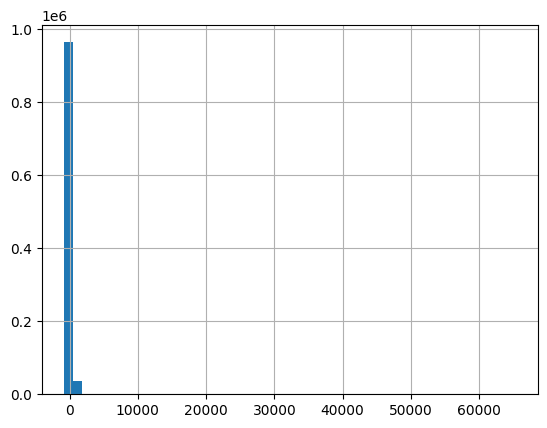

In [21]:
df['TotalPremium'].hist(bins=50)

<Axes: xlabel='Gender'>

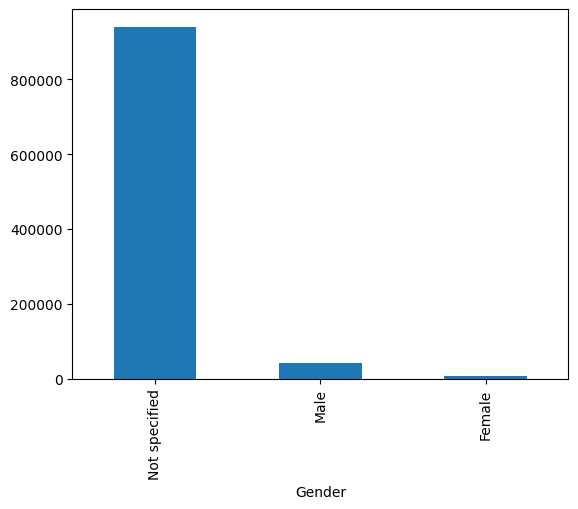

In [22]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='TotalPremium', ylabel='TotalClaims'>

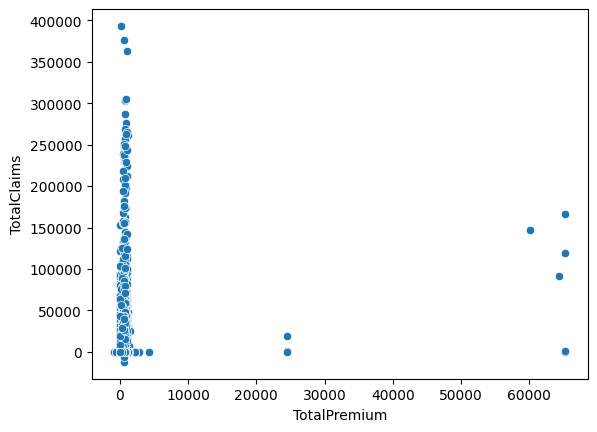

In [23]:
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims')

<Axes: >

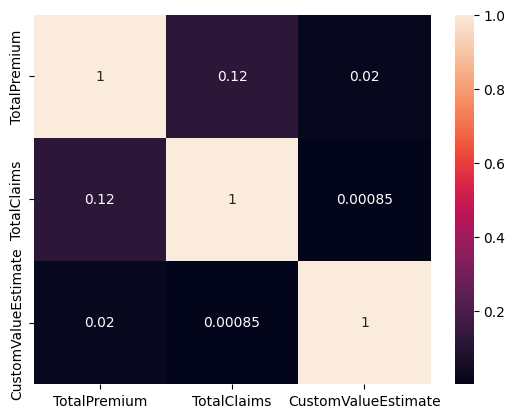

In [24]:
sns.heatmap(df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].corr(), annot=True)

<Axes: >

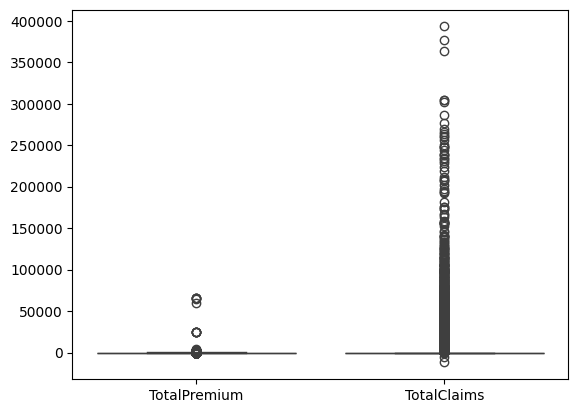

In [25]:
sns.boxplot(data=df[['TotalPremium', 'TotalClaims']])

In [26]:
df.groupby('PostalCode')['TotalClaims'].mean().sort_values(ascending=False).head(10)

PostalCode
466     2192.982456
2920    1758.275279
1342    1548.412041
1751    1343.309410
9756    1193.336058
2070     888.855263
3651     886.995238
9323     813.397129
1665     752.800385
81       694.309338
Name: TotalClaims, dtype: float64

<Axes: xlabel='CoverType', ylabel='count'>

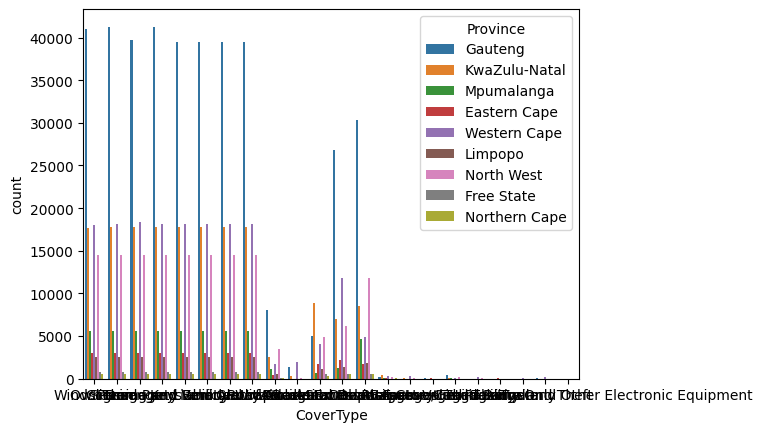

In [27]:
sns.countplot(data=df, x='CoverType', hue='Province')